         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

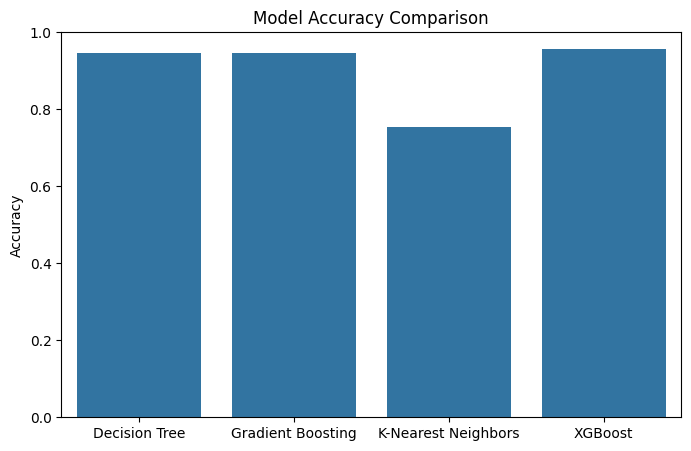

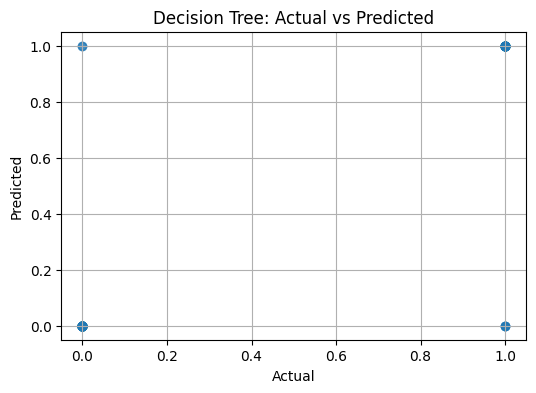

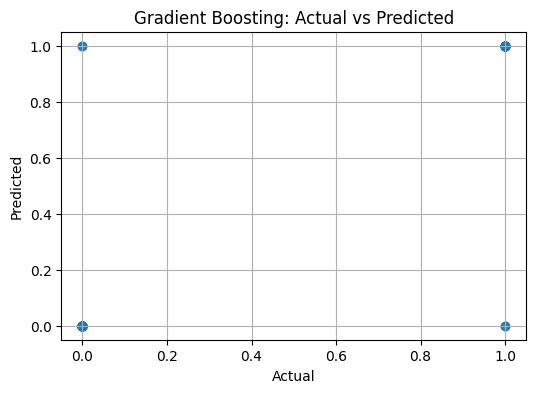

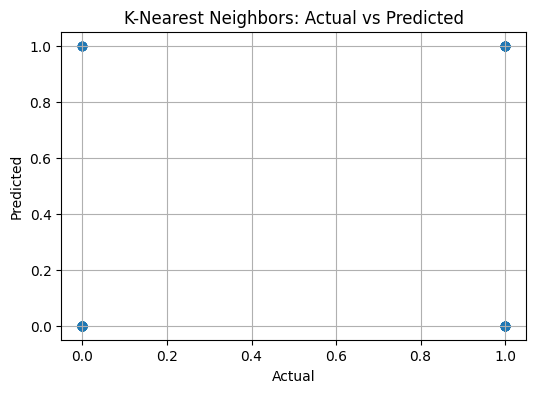

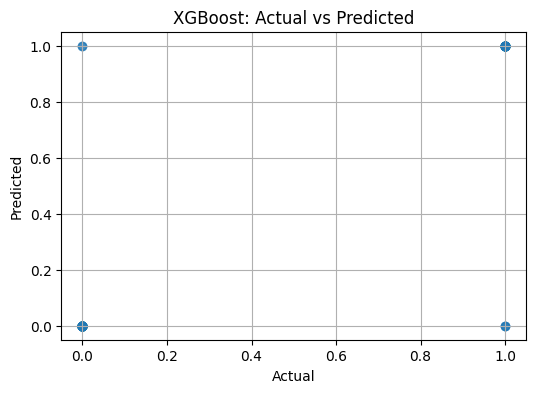

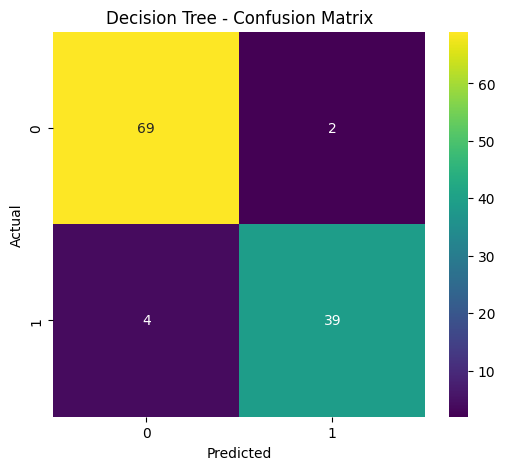

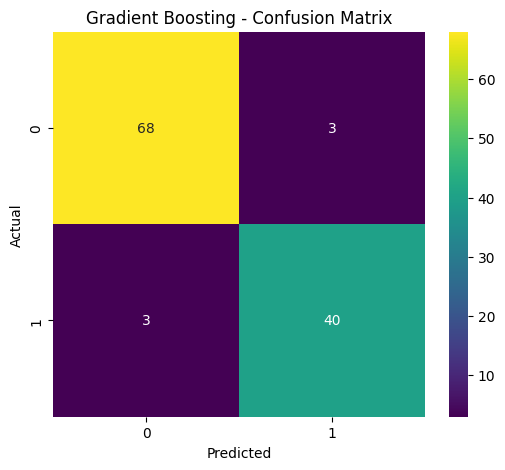

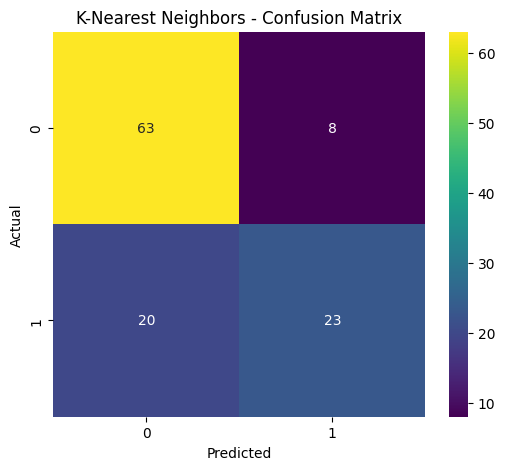

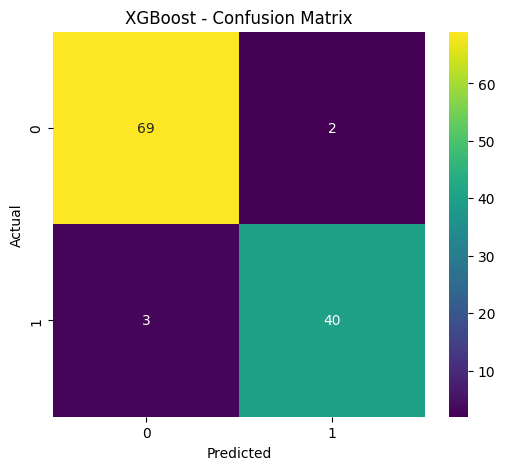

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/breast-cancer.csv')  # Replace with the path to your CSV file

# Inspect the columns to identify target column
print(df.head())
print(df.columns)

# Assuming the target column is 'diagnosis', encode the target variable
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # Encode 'B' as 0 and 'M' as 1

# Define features (X) and target (y)
X = df.drop(columns=['diagnosis'])  # Features (all columns except target)
y = df['diagnosis']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier( eval_metric='logloss', random_state=42)
}

# To store the metrics
metrics = {}

# Train each model and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)

    metrics[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'Accuracy': accuracy,
        'Confusion Matrix': cm
    }

    # Print the metrics for each model
    print(f"\n{model_name} Metrics:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

# Step 1: Accuracy comparison bar chart
model_names = list(metrics.keys())
accuracies = [metrics[model]['Accuracy'] for model in model_names]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Step 2: Scatter plots: Actual vs Predicted
for i, model_name in enumerate(model_names):
    pred = models[model_name].predict(X_test)
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, pred, alpha=0.6)
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

# Step 3: Confusion matrices
for i, model_name in enumerate(model_names):
    cm = metrics[model_name]['Confusion Matrix']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

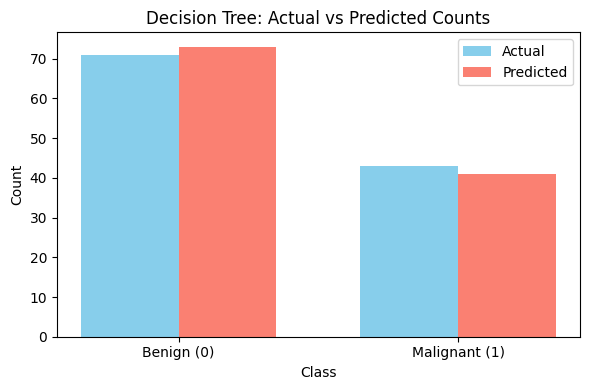

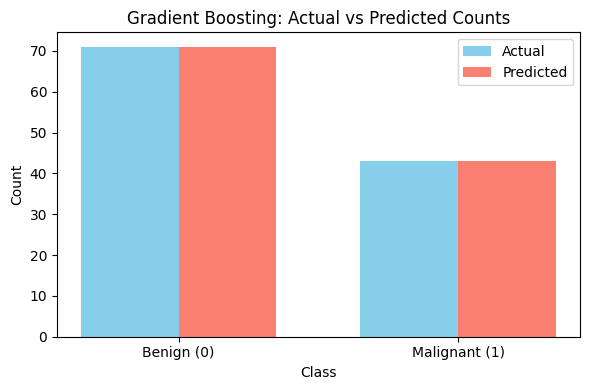

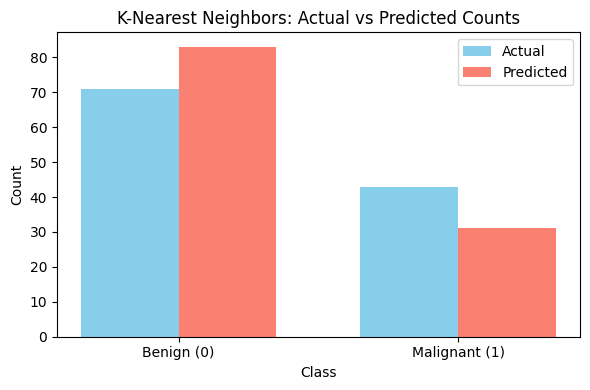

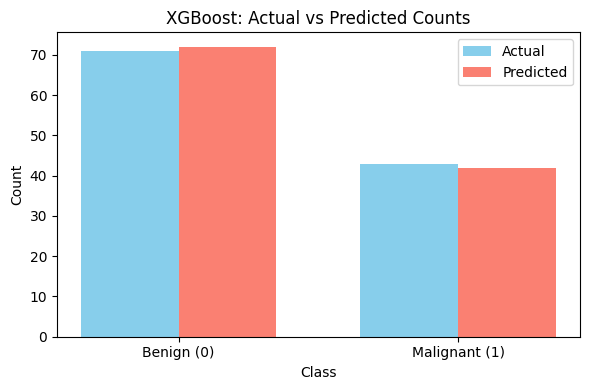

In [ ]:
# Improved Visualization: Bar plots for Actual vs Predicted counts
import numpy as np

for model_name in model_names:
    pred = models[model_name].predict(X_test)

    # Count actual vs predicted
    actual_counts = np.bincount(y_test)
    predicted_counts = np.bincount(pred)

    # Ensure both arrays are same length (for binary classification)
    if len(actual_counts) < 2:
        actual_counts = np.append(actual_counts, 0)
    if len(predicted_counts) < 2:
        predicted_counts = np.append(predicted_counts, 0)

    # Bar plot
    x = np.arange(2)
    width = 0.35

    plt.figure(figsize=(6, 4))
    plt.bar(x - width/2, actual_counts, width, label='Actual', color='skyblue')
    plt.bar(x + width/2, predicted_counts, width, label='Predicted', color='salmon')
    plt.xticks(x, ['Benign (0)', 'Malignant (1)'])
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title(f'{model_name}: Actual vs Predicted Counts')
    plt.legend()
    plt.tight_layout()
    plt.show()


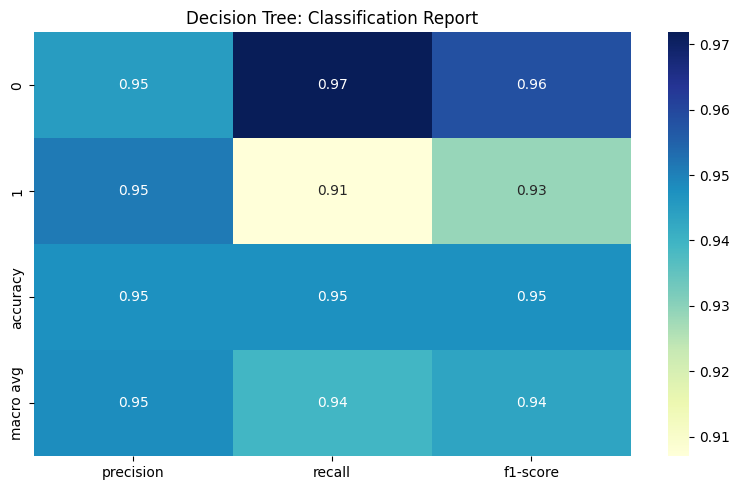

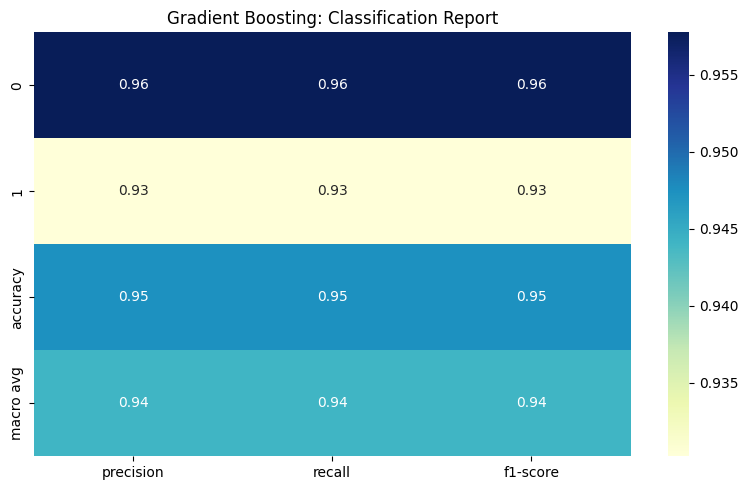

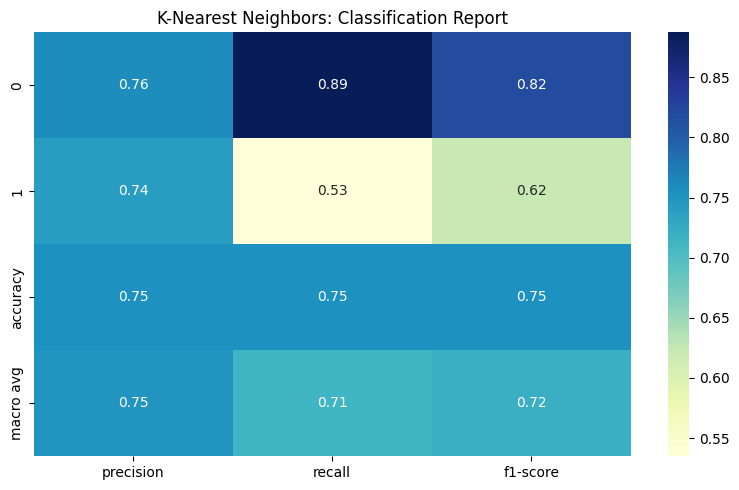

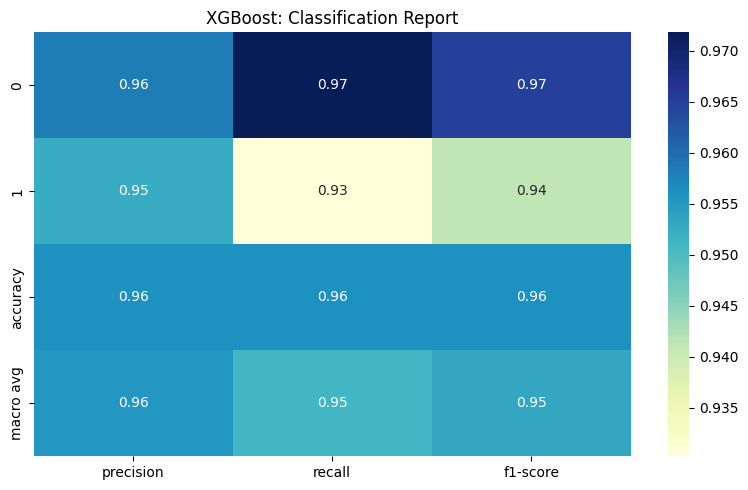

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns

for model_name in model_names:
    pred = models[model_name].predict(X_test)
    report = classification_report(y_test, pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    plt.figure(figsize=(8, 5))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f'{model_name}: Classification Report')
    plt.tight_layout()
    plt.show()


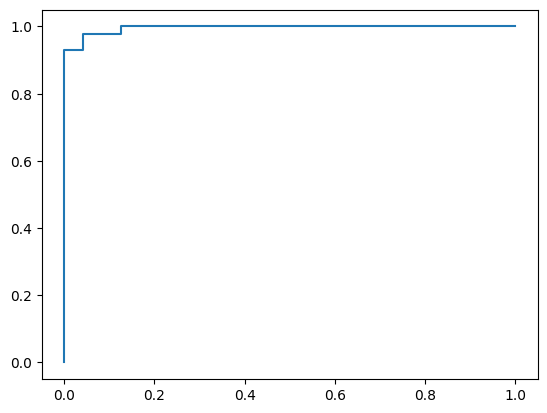

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc(fpr, tpr):.2f})')


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2, 3, 4, 5]}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5]})

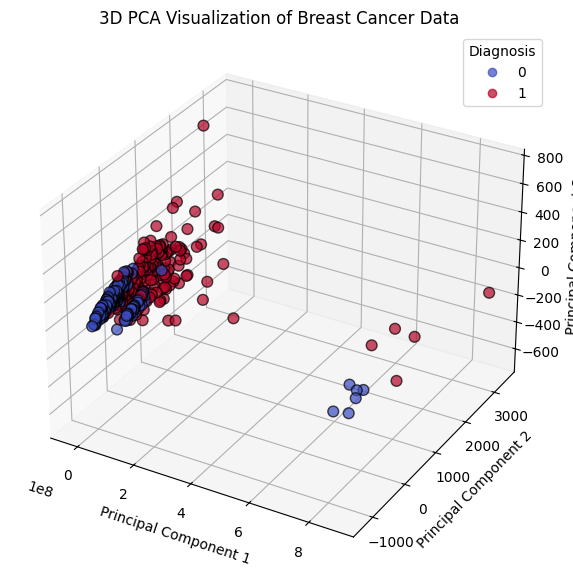

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot (color-coded by diagnosis)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=y, cmap='coolwarm', s=60, edgecolor='k', alpha=0.7)

ax.set_title('3D PCA Visualization of Breast Cancer Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(*scatter.legend_elements(), title="Diagnosis")
plt.show()


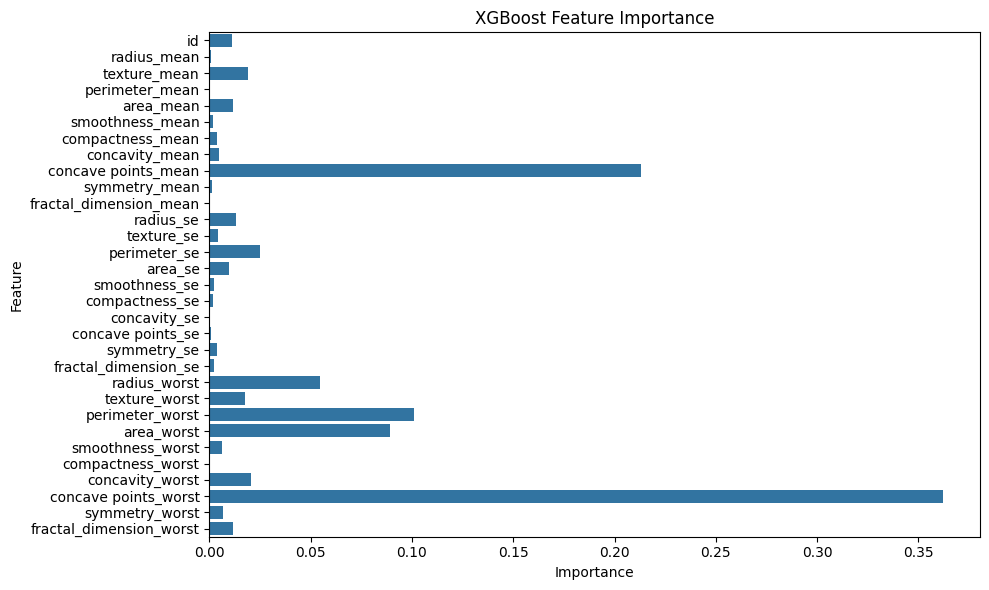

In [ ]:
xgb_model = models['XGBoost']
importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
